# 逐段三次样条 ($\mathbb{S}_3^2$ Splne)

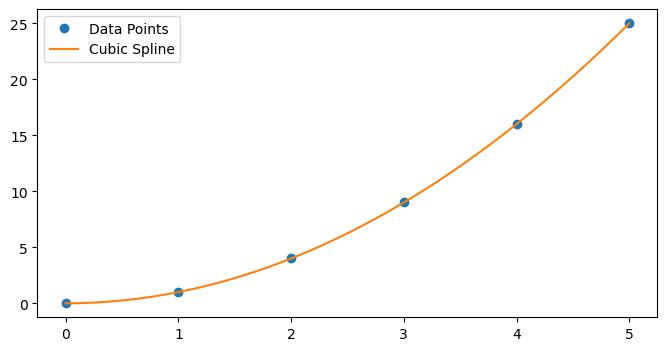

In [1]:
import numpy as np  
from scipy.interpolate import CubicSpline  
import matplotlib.pyplot as plt  
  
# 准备数据点  
x = np.array([0, 1, 2, 3, 4, 5])  
y = np.array([0, 1, 4, 9, 16, 25])  
  
# 创建逐段三次样条对象  
cs = CubicSpline(x, y)  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(0, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)  
  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show()  

In [2]:
def Runge(x):
    return 1.0 / (1.0 + x**2)

In [ ]:
# 准备数据点  
n = 5
x = np.linspace(-5, 5, n)
y = Runge(x)
  
# 创建逐段三次样条对象  
cs = CubicSpline(x, y)  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)

# 真解
y_real = Runge(x_new)
  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show()  

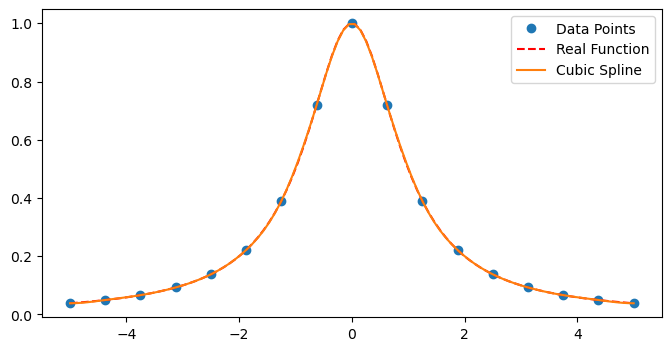

In [5]:
# 准备数据点  
n = 17
x = np.linspace(-5, 5, n)
y = Runge(x)
  
# D1 边界条件
start_derivative = 10.0 / 26.0**2 
end_derivative = -start_derivative

# 创建逐段三次样条对象  
cs = CubicSpline(x, y, bc_type=('clamped'))  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)

# 真解
y_real = Runge(x_new)

  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show() 
# 指定起点和终点的导数  


# B-Spline

现在我们严格按照讲义定义做一些测试, 先构建 B-样条基函数 :

In [49]:
def Bspline(n, i, x):
    if (n == 0):
        return (x > i - 1) * (x <= i) * 1.0
    else:
        return (x - i + 1) / n * Bspline(n - 1, i, x) + (i + n - x) / n * Bspline(n - 1, i + 1, x)

In [37]:
x = np.linspace(0, 10, 1000)
Z = np.linspace(0, 10, 11)

$B_i^0$ 是支撑在 $(t_{i - 1}, t_i)$ 上的：

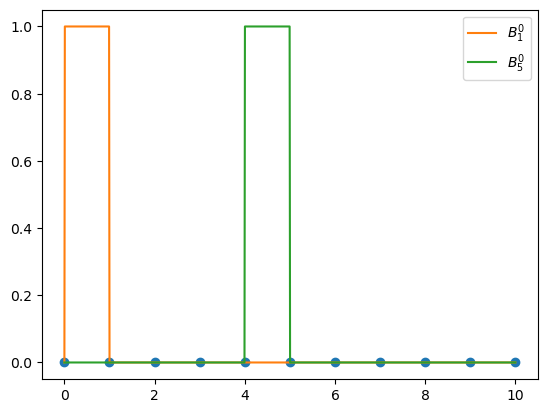

In [57]:
n = 0
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

所以考虑一下为什么说
$$
\sum_{i = -\infty}^{\infty} B_i^0 = 1.
$$
以及这个无穷求和的实际意义。然后 $B_i^1$ 是支撑在 $(t_{i - 1}, t_{i + 1})$ 上的：

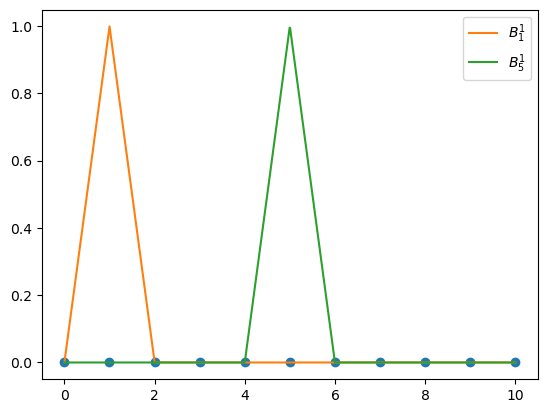

In [58]:
n = 1
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

$B_i^2$ 是支撑在 $(t_{i - 1}, t_{i + 2})$ 上的：

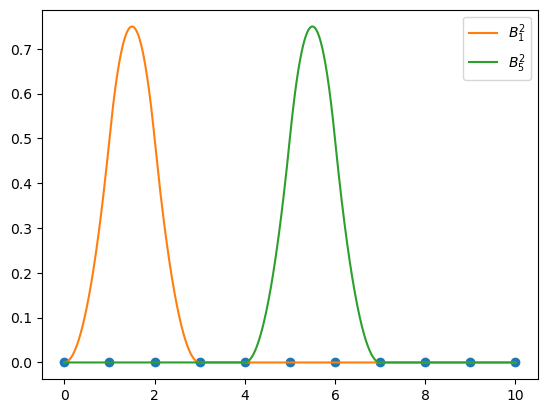

In [59]:
n = 2
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

现在我们可以考虑一下，$B_i^n$ 是支撑在 $(t_{i - 1}, t_{i + n})$ 上的：

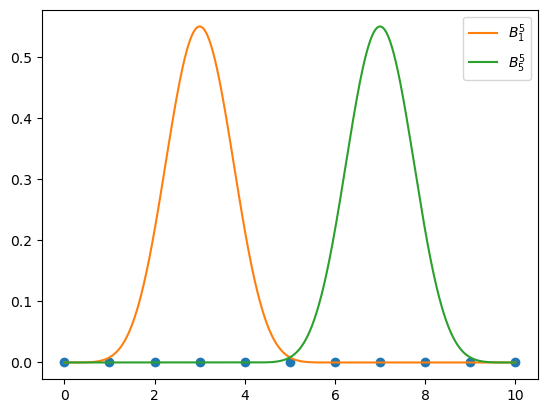

In [60]:
n = 5
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

以及推论 3.52 含义，内部的基是对称的。比如这里我们看到基确实都是对称的。

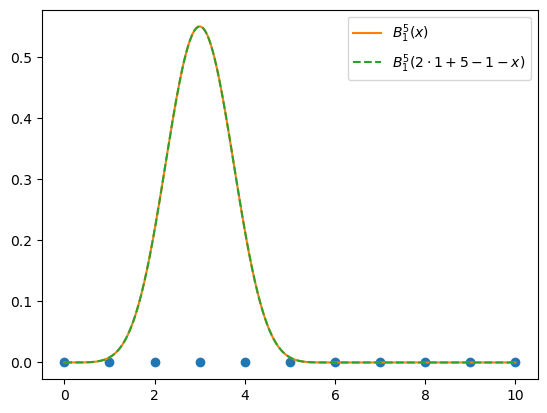

In [68]:
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}(x)$')
plt.plot(x, Bspline(n, 1, n + 1 - x), '--',label=f'$B_{i}^{n}(2\\cdot{i} + {n} - 1 - x)$')
plt.legend()  

在边界上，支撑会不同，因此失去对称性。想想 $B_i^1$ 在 $\mathbb{S}_1^0$ 中的情况。现在我们可以验证例 3.53.

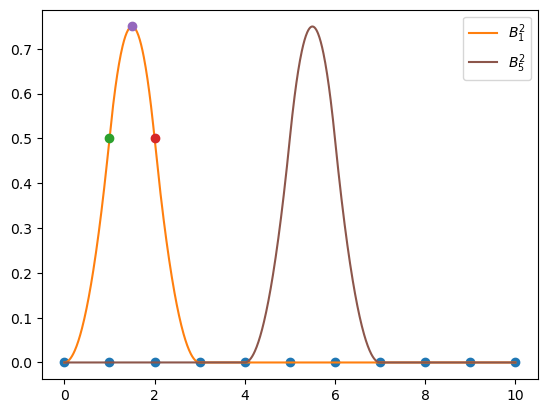

In [80]:
n = 2
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
plt.plot(1, 0.5, 'o')
plt.plot(2, 0.5, 'o')
plt.plot(1.5, 3/4, 'o')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

现在我们可以验证例 3.54.

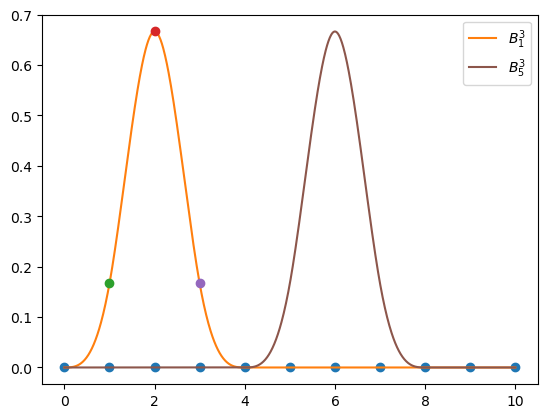

In [84]:
n = 3
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
plt.plot(1, 1/6, 'o')
plt.plot(2, 2/3, 'o')
plt.plot(3, 1/6, 'o')  # 推论 3.52 
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

下面拼装一下 S32 样条。参照课本定理 3.57，在节点 $1, 2, \ldots, 10$ 上拼装。

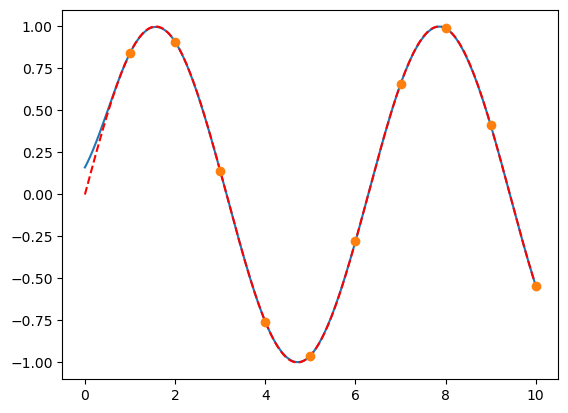

In [140]:
# 目标函数
def func(x):
    return np.sin(x)

# 导数
def dfunc(x):
    return np.cos(x)

# 节点数
N = 10

# 构建三对角矩阵 M
U = np.diag(np.ones(N - 1), 1)
D = np.ones(N) * 4
D[0] = D[-1] = 2
L = np.transpose(U)
M = np.diag(D) + U + L

# 构建右端项 b
b = [func(i) * 6 for i in range(1, N + 1, 1)]

# 应用边界条件 D1
b[0] = 3 * func(1) + dfunc(1)
b[-1] = 3 * func(10) - dfunc(10)

# 解出内部基组合系数 a
a = np.linalg.solve(M,b)

# 补上边界系数
s = np.zeros(len(a) + 2)
s[1:-1] = a
s[0] = s[2] - 2 * dfunc(1)
s[-1] = s[-3] + 2 * dfunc(10)

# 拼装样条，低效！
def S32(x):
    S = 0
    for i in range(-1,11):
        S = S + s[i + 1] * Bspline(3, i, x)
    return S

# 绘制拟合结果
plt.plot(x, S32(x), x, func(x), 'r--')
# plt.plot(range(0,11,1),np.zeros(11), 'o')
t = range(1,11,1)
plt.plot(t, func(t), 'o')

注意标出了拟合节点。

# B-Spline 

开一个演示讲义. scipy 自带 BSpline 模块.

In [1]:
import numpy as np
from scipy.interpolate import BSpline as bspline
from matplotlib import pyplot as plt

我们先利用内置的 B 样条模块, 对样条基函数建立一个直观感受:

In [2]:
def draw_basis(N, n, i):
    t = np.linspace(-10, 10, num = N + n + 1, endpoint=True)
    f = np.zeros((N, N))
    for j in range(N):
        f[j, j] = 1
    spl = bspline(t, f[i,:], n)
    x = np.linspace(t[n], t[-(n+1)], num=400, endpoint=True)
    o = np.ones(len(x))
    plt.plot(x, spl(x), x, o, '--')

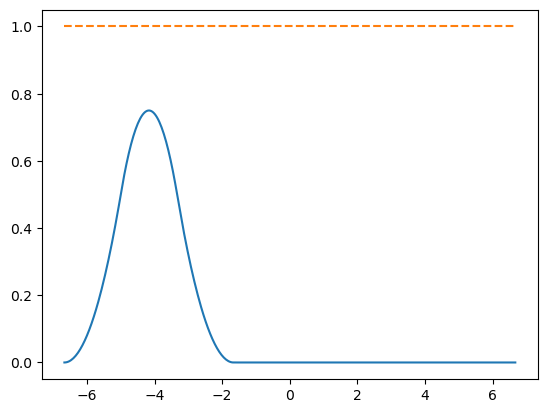

In [3]:
draw_basis(10, 2, 2)

画出全部 $n$ 阶 B 样条基函数:

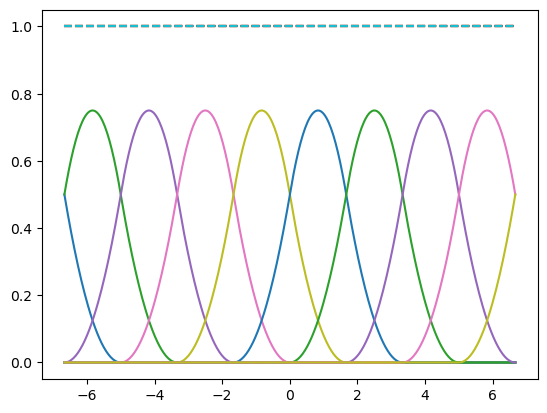

In [4]:
n = 2
N = 10
for i in range(N):
    draw_basis(N, n, i)

公式浓缩了信息. 比如这里利用一阶截断指数函数描述了 $(t - x)_+$ 这样的分段线性函数:

In [5]:
def tpow(x, t):
    t = np.ones(len(x)) * t
    return(t - x > 0) * (t - x)

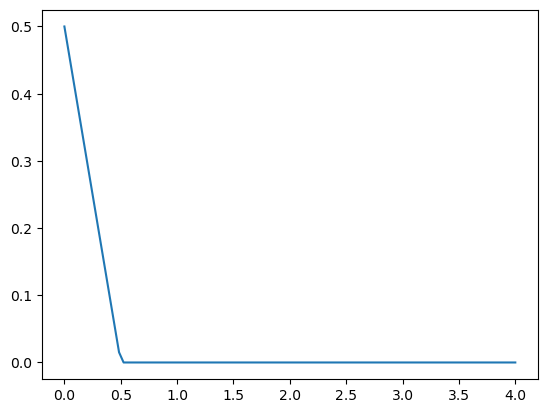

In [6]:
x = np.linspace(0, 4, 100)
t = 0.5
plt.plot(x, tpow(x, t))

分段线性函数在相邻节点的图像, 也就是讲义例子 3.31 下方图的第一列:

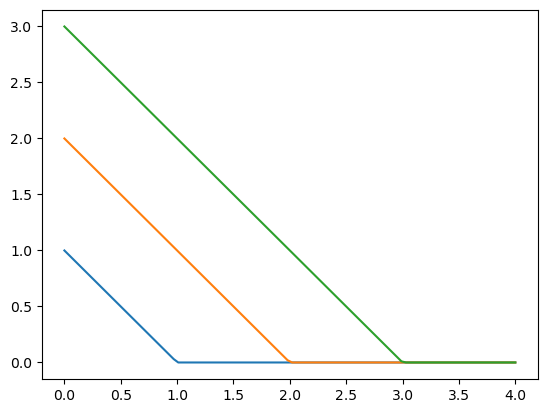

In [7]:
plt.plot(x, tpow(x, 1.0), x, tpow(x, 2.0), x, tpow(x, 3.0))

再利用分段线性函数在相邻节点的差商 $\frac{(t_{i + 1} - x)_+ - (t_i - x)_+}{t_{i + 1} - t_i}$, 将导数的跳跃限制在目标区间. 即讲义例 3.31 下图的第二列:

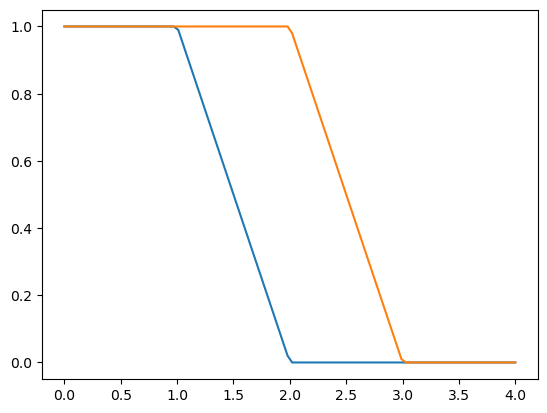

In [8]:
plt.plot(x, tpow(x, 2.0) - tpow(x, 1.0), x, tpow(x, 3.0) - tpow(x, 2.0))

上面两条曲线再做差, 就得到 B 样条一次局部基函数: 

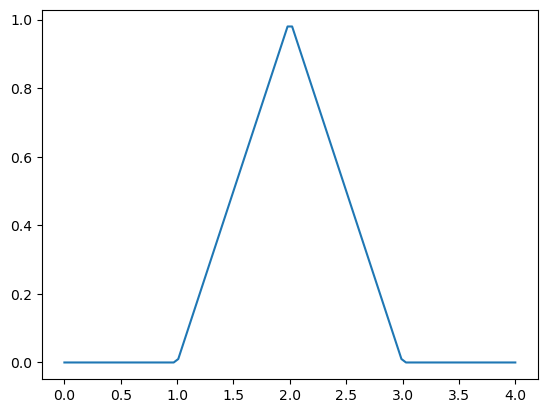

In [9]:
plt.plot(x, tpow(x, 3.0) - tpow(x, 2.0) - (tpow(x, 2.0) - tpow(x, 1.0)))

现在我们严格按照讲义定义做一些测试, 先构建 B-样条基函数 $B_{i, \mathbb{Z}}^n$:

In [10]:
def Bspline(n, i, x):
    if (n == 0):
        return (x > i - 1) * (x <= i) * 1.0
    else:
        return (x - i + 1) / n * Bspline(n - 1, i, x) + (i + n - x) / n * Bspline(n - 1, i + 1, x)

随便画画做做测试:

In [11]:
x = np.linspace(0, 10, 100)

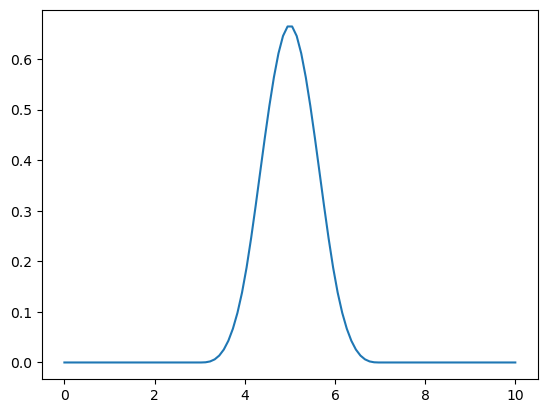

In [12]:
plt.plot(x, Bspline(3, 4, x))

现在构建一个目标函数进行拟合: 
$$
f(x) = \sin(\frac{\pi}{2}x), 
$$
因为是函数拟合, 所以我们可以直接手工构建函数和导函数:

In [ ]:
def obj_func(x):
    return np.sin(0.5 * np.pi * x)
def obj_dfunc(x):
    return 0.5 * np.pi * np.cos(0.5 * np.pi * x)

这里夹带点私货, 把我们接下去需要的三对角方程组求解器准备好, 也就是追赶法, 国外叫 Thomas 算法: 

In [ ]:
def Thomas(La, Mb, Uc, Rd):
    # https://www.jianshu.com/p/ef2027568912
    n=len(Mb)
    c=np.zeros(n-1)
    d=np.zeros(n)
    c[0]=Uc[0]/Mb[0]
    for i in range(1,n-1):
        c[i]=Uc[i]/(Mb[i]-c[i-1]*La[i-1])
    d[0]=Uc[0]/Mb[0]
    for i in range(1,n):
        d[i]=(Rd[i]-(d[i-1]*La[i-1]))/(Mb[i]-c[i-1]*La[i-1])
    ls=list(range(n-1))[::-1]
    x=np.zeros(n)
    x[n-1]=d[n-1]
    for i in ls:
        x[i]=d[i]-c[i]*x[i+1]
    return(x)

自己重构的原因是我们可以直接针对数组的形式进行计算, 反正这个算法很容易实现, 网上到处都是, 这里注释中标注了参考网站. 现在我们对一下符号, N, a, b 意义和讲义一致. Md 是三对角矩阵 M 的对角元, Mb 和 Ma 分别表示下和上副对角线. M 阵是对称的, 但这个并没有给追赶法带来额外的好处. 

In [ ]:
N = 15
Md = np.ones(N) * 4.0
Md[0] = Md[N - 1] = 2.0
Mb = Ma = np.ones(N - 1)
b = np.zeros(N)
for i in range(1, N - 1):
    b[i] = obj_func(i + 1) * 6.0
b[0] = obj_func(1) * 3.0 + obj_dfunc(1)
b[N - 1] = obj_func(N) * 3.0 - obj_dfunc(N)
a = np.zeros(N + 2)

解线性方程组:

In [ ]:
a[1:N+1] = Thomas(Ma, Md, Ma, b)

处理边界:

In [ ]:
a[0] = a[2] - obj_dfunc(1) * 2.0
a[N+1] = a[N-1] + obj_dfunc(N) * 2.0

根据计算出来的系数 a 拼装样条函数 s, 也即讲义中的 (3.71):

In [ ]:
x = np.linspace(0, 16, 400)
s = np.zeros(400)
for i in range(-1,N+1):
    s += a[i + 1] * Bspline(3,i,x)

绘制模拟结果, 注意虚线是原函数, 实线是样条拟合结果:

In [ ]:
plt.plot(x, s, x, obj_func(x), '--')

大家注意到, 似乎好的拟合区间局限在 $[3, 15]$? 画一下误差曲线能验证:

In [ ]:
x = np.linspace(0, 16, 400)
s = np.zeros(400)
for i in range(-1,N+1):
    s += a[i + 1] * Bspline(3,i,x)
plt.plot(x, s - obj_func(x), '--')

In [ ]:
x = np.linspace(2, 16, 400)
s = np.zeros(400)
for i in range(-1,N+1):
    s += a[i + 1] * Bspline(3,i,x)
plt.plot(x, s - obj_func(x), '--')

In [ ]:
x = np.linspace(3, 15, 400)
s = np.zeros(400)
for i in range(-1,N+1):
    s += a[i + 1] * Bspline(3,i,x)
plt.plot(x, s - obj_func(x), '--')

注意我这里每一次的 $B_{i, \mathbb{Z}}^n$ 都重算了, 实际工作中, 可以算好存在那里. 一个问题是, 为什么我们的型值点是分布在 $[1, 15]$, 但是准确的拟合是 $[3, 15]$? 是有 bug 么?

**本程序仅供演示和理解算法使用, 严禁用于实际计算工作.**

In [ ]:
import numpy as np  
from scipy.interpolate import CubicSpline  
import matplotlib.pyplot as plt  
  
# 准备数据点  
x = np.array([0, 1, 2, 3, 4, 5])  
y = np.array([0, 1, 4, 9, 16, 25])  
  
# 指定起点和终点的一阶导数  
start_derivative = 1  
end_derivative = 3  
  
# 创建逐段三次样条对象，指定边界条件为 'clamped'  
cs = CubicSpline(x, y, bc_type=('clamped', (start_derivative, end_derivative)))  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(0, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)  
  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='数据点')  
plt.plot(x_new, y_new, label='逐段三次样条')  
plt.legend()  
plt.show()  